A very wide range of physical processes lead to wave motion, where
signals are propagated through a medium in space and time, normally
with little or no permanent movement of the medium itself.
The shape of the signals may undergo changes as they travel through
matter, but usually not so much that the signals cannot be recognized
at some later point in space and time.
Many types of wave motion can be described by the equation
$u_{tt}=\nabla\cdot (c^2\nabla u) + f$, which we will solve
in the forthcoming text by finite difference methods.

# Simulation of waves on a string
<div id="wave:string"></div>

We begin our study of wave equations by simulating one-dimensional
waves on a string, say on a guitar or violin.
Let the string in the undeformed state
coincide with the interval
$[0,L]$ on the $x$ axis, and let $u(x,t)$ be the displacement at
time $t$ in the $y$ direction of a point initially at $x$.
The displacement function $u$ is governed by the mathematical model

<!-- Equation labels as ordinary links -->
<div id="wave:pde1"></div>

$$
\begin{equation}
\frac{\partial^2 u}{\partial t^2} =
c^2 \frac{\partial^2 u}{\partial x^2}, \quad x\in (0,L),\ t\in (0,T]
\label{wave:pde1} \tag{1}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="wave:pde1:ic:u"></div>

$$
\begin{equation}  
u(x,0) = I(x), \quad x\in [0,L]
\label{wave:pde1:ic:u} \tag{2}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="wave:pde1:ic:ut"></div>

$$
\begin{equation}  
\frac{\partial}{\partial t}u(x,0) = 0, \quad x\in [0,L]
\label{wave:pde1:ic:ut} \tag{3}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="wave:pde1:bc:0"></div>

$$
\begin{equation}  
u(0,t)  = 0, \quad  t\in (0,T]
\label{wave:pde1:bc:0} \tag{4}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="wave:pde1:bc:L"></div>

$$
\begin{equation}  
u(L,t)  = 0, \quad  t\in (0,T]
\label{wave:pde1:bc:L} \tag{5}
\end{equation}
$$

The constant $c$ and the function $I(x)$ must be prescribed.

Equation ([1](#wave:pde1)) is known as the one-dimensional
*wave equation*. Since this PDE contains a second-order derivative
in time, we need *two initial conditions*. The condition
([2](#wave:pde1:ic:u)) specifies
the initial shape of the string, $I(x)$, and
([3](#wave:pde1:ic:ut)) expresses that the initial velocity of the
string is zero. In addition, PDEs need *boundary conditions*, given here as
([4](#wave:pde1:bc:0)) and ([5](#wave:pde1:bc:L)). These two
conditions specify that
the string is fixed at the ends, i.e., that the displacement $u$ is zero.

The solution $u(x,t)$ varies in space and time and describes waves that
move with velocity $c$ to the left and right.


Sometimes we will use a more compact notation for the partial derivatives
to save space:

<!-- Equation labels as ordinary links -->
<div id="_auto1"></div>

$$
\begin{equation}
u_t = \frac{\partial u}{\partial t}, \quad
u_{tt} = \frac{\partial^2 u}{\partial t^2},
\label{_auto1} \tag{6}
\end{equation}
$$

and similar expressions
for derivatives with respect to other variables. Then the
wave equation can be written compactly as $u_{tt} = c^2u_{xx}$.



The PDE problem ([1](#wave:pde1))-([5](#wave:pde1:bc:L)) will now be
discretized in space and time by a finite difference method.


## Discretizing the domain
<div id="wave:string:mesh"></div>


The temporal domain $[0,T]$ is represented by a finite number of mesh points

<!-- Equation labels as ordinary links -->
<div id="_auto2"></div>

$$
\begin{equation}
0 = t_0 < t_1 < t_2 < \cdots < t_{N_t-1} < t_{N_t} = T    \label{_auto2} \tag{7}
\end{equation}
$$

Similarly, the spatial domain $[0,L]$ is replaced by a set of mesh points

<!-- Equation labels as ordinary links -->
<div id="_auto3"></div>

$$
\begin{equation}
0 = x_0 < x_1 < x_2 < \cdots < x_{N_x-1} < x_{N_x} = L   \label{_auto3} \tag{8}
\end{equation}
$$

One may view the mesh as two-dimensional in the $x,t$ plane, consisting
of points $(x_i, t_n)$, with $i=0,\ldots,N_x$ and $n=0,\ldots,N_t$.



### Uniform meshes

For uniformly distributed mesh points we can introduce the constant
mesh spacings $\Delta t$ and $\Delta x$. We have that

<!-- Equation labels as ordinary links -->
<div id="_auto4"></div>

$$
\begin{equation}
x_i = i\Delta x,\ i=0,\ldots,N_x,\quad
t_n = n\Delta t,\ n=0,\ldots,N_t
\label{_auto4} \tag{9}
\end{equation}
$$

We also have that $\Delta x = x_i-x_{i-1}$, $i=1,\ldots,N_x$, and
$\Delta t = t_n - t_{n-1}$, $n=1,\ldots,N_t$. [Figure](#wave:pde1:fig:mesh)
displays a mesh in the $x,t$ plane with $N_t=5$, $N_x=5$, and constant
mesh spacings.

## The discrete solution
<div id="wave:string:numerical:sol"></div>


The solution $u(x,t)$ is sought at the mesh points. We introduce
the mesh function $u_i^n$, which approximates the exact
solution at the
mesh point $(x_i,t_n)$ for $i=0,\ldots,N_x$ and $n=0,\ldots,N_t$.
Using the finite difference method, we shall
develop algebraic equations for computing the mesh function.

## Fulfilling the equation at the mesh points
<div id="wave:string:samplingPDE"></div>


In the finite difference method, we relax
the condition that ([1](#wave:pde1)) holds at all points in
the space-time domain $(0,L)\times (0,T]$ to the requirement that the PDE is
fulfilled at the *interior* mesh points only:

<!-- Equation labels as ordinary links -->
<div id="wave:pde1:step2"></div>

$$
\begin{equation}
\frac{\partial^2}{\partial t^2} u(x_i, t_n) =
c^2\frac{\partial^2}{\partial x^2} u(x_i, t_n),
\label{wave:pde1:step2} \tag{10}
\end{equation}
$$

for $i=1,\ldots,N_x-1$ and $n=1,\ldots,N_t-1$. For $n=0$ we have
the initial conditions $u=I(x)$ and $u_t=0$,
and at the boundaries $i=0,N_x$ we
have the boundary condition $u=0$.

## Replacing derivatives by finite differences
<div id="wave:string:fd"></div>

The second-order derivatives can be replaced by central
differences. The most widely used difference approximation of
the second-order derivative is

$$
\frac{\partial^2}{\partial t^2}u(x_i,t_n)\approx
\frac{u_i^{n+1} - 2u_i^n + u^{n-1}_i}{\Delta t^2}\
$$

mathcal{I}_t is convenient to introduce the finite difference operator notation

$$
[D_tD_t u]^n_i = \frac{u_i^{n+1} - 2u_i^n + u^{n-1}_i}{\Delta t^2}
$$

A similar approximation of the second-order derivative in the $x$
direction reads

$$
\frac{\partial^2}{\partial x^2}u(x_i,t_n)\approx
\frac{u_{i+1}^{n} - 2u_i^n + u^{n}_{i-1}}{\Delta x^2} = [D_xD_x u]^n_i
$$

### Algebraic version of the PDE

We can now replace the derivatives in ([10](#wave:pde1:step2))
and get

<!-- Equation labels as ordinary links -->
<div id="wave:pde1:step3b"></div>

$$
\begin{equation}
\frac{u_i^{n+1} - 2u_i^n + u^{n-1}_i}{\Delta t^2} =
c^2\frac{u_{i+1}^{n} - 2u_i^n + u^{n}_{i-1}}{\Delta x^2},
\label{wave:pde1:step3b} \tag{11}
\end{equation}
$$

or written more compactly using the operator notation:

<!-- Equation labels as ordinary links -->
<div id="wave:pde1:step3a"></div>

$$
\begin{equation}
[D_tD_t u = c^2 D_xD_x]^{n}_i
\label{wave:pde1:step3a} \tag{12}
\end{equation}
$$

### Interpretation of the equation as a stencil

A characteristic feature of ([11](#wave:pde1:step3b)) is that it
involves $u$ values from neighboring points only: $u_i^{n+1}$,
$u^n_{i\pm 1}$, $u^n_i$, and $u^{n-1}_i$.  The circles in [Figure](#wave:pde1:fig:mesh) illustrate such neighboring mesh points that
contribute to an algebraic equation. In this particular case, we have
sampled the PDE at the point $(2,2)$ and constructed
([11](#wave:pde1:step3b)), which then involves a coupling of $u_1^2$,
$u_2^3$, $u_2^2$, $u_2^1$, and $u_3^2$.  The term *stencil* is often
used about the algebraic equation at a mesh point, and the geometry of
a typical stencil is illustrated in [Figure](#wave:pde1:fig:mesh). One also often refers to the algebraic
equations as *discrete equations*, *(finite) difference equations* or
a *finite difference scheme*.

<!-- dom:FIGURE: [mov-wave/D_stencil_gpl/stencil_n_interior.png, width=500] Mesh in space and time. The circles show points connected in a finite difference equation. <div id="wave:pde1:fig:mesh"></div> -->
<!-- begin figure -->
<div id="wave:pde1:fig:mesh"></div>

<p>Mesh in space and time. The circles show points connected in a finite difference equation.</p>
<img src="mov-wave/D_stencil_gpl/stencil_n_interior.png" width=500>

<!-- end figure -->



### Algebraic version of the initial conditions

We also need to replace the derivative in the initial condition
([3](#wave:pde1:ic:ut)) by a finite difference approximation.
A centered difference of the type

$$
\frac{\partial}{\partial t} u(x_i,t_0)\approx
\frac{u^1_i - u^{-1}_i}{2\Delta t} = [D_{2t} u]^0_i,
$$

seems appropriate. Writing out this equation and ordering the terms give

<!-- Equation labels as ordinary links -->
<div id="wave:pde1:step3c"></div>

$$
\begin{equation}
u^{-1}_i=u^{1}_i,\quad i=0,\ldots,N_x
\label{wave:pde1:step3c} \tag{13}
\end{equation}
$$

The other initial condition can be computed by

$$
u_i^0 = I(x_i),\quad i=0,\ldots,N_x
$$

## Formulating a recursive algorithm
<div id="wave:string:alg"></div>


We assume that $u^n_i$ and $u^{n-1}_i$ are available for
$i=0,\ldots,N_x$.  The only unknown quantity in
([11](#wave:pde1:step3b)) is therefore $u^{n+1}_i$, which we now can
solve for:

<!-- Equation labels as ordinary links -->
<div id="wave:pde1:step4"></div>

$$
\begin{equation}
u^{n+1}_i = -u^{n-1}_i + 2u^n_i + C^2
\left(u^{n}_{i+1}-2u^{n}_{i} + u^{n}_{i-1}\right)
\label{wave:pde1:step4} \tag{14}
\end{equation}
$$

We have here introduced the parameter

<!-- Equation labels as ordinary links -->
<div id="_auto5"></div>

$$
\begin{equation}
C = c\frac{\Delta t}{\Delta x},
\label{_auto5} \tag{15}
\end{equation}
$$

known as the *Courant number*.


**$C$ is the key parameter in the discrete wave equation.**


We see that the discrete version of the PDE features only one
parameter, $C$, which is therefore the key parameter, together with
$N_x$, that governs the quality of the numerical solution (see the section [Analysis of the difference equations](wave_analysis.ipynb) for details). Both the primary physical
parameter $c$ and the numerical parameters $\Delta x$ and $\Delta t$
are lumped together in $C$. Note that $C$ is a dimensionless
parameter.



Given that $u^{n-1}_i$ and $u^n_i$ are known for $i=0,\ldots,N_x$,
we find new values at the next time level by applying the formula
([14](#wave:pde1:step4)) for $i=1,\ldots,N_x-1$. [Figure](#wave:pde1:fig:mesh) illustrates the points that are used to
compute $u^3_2$. For the boundary points, $i=0$ and $i=N_x$, we apply
the boundary conditions $u_i^{n+1}=0$.


Even though sound reasoning leads up to
([14](#wave:pde1:step4)), there is still a minor challenge with it that needs
to be resolved. Think of the very first computational step to be made.
The scheme ([14](#wave:pde1:step4)) is supposed to start at $n=1$, which means
that we compute $u^2$ from $u^1$ and $u^0$. Unfortunately, we do not know the
value of $u^1$, so how to proceed? A standard procedure in such cases is to
apply ([14](#wave:pde1:step4)) also for $n=0$. This immediately seems strange,
since it involves $u^{-1}_i$, which is an undefined
quantity outside the time mesh (and the time domain). However, we can
use the initial condition ([13](#wave:pde1:step3c)) in combination with
([14](#wave:pde1:step4)) when $n=0$ to eliminate $u^{-1}_i$ and
arrive at a special formula for $u_i^1$:

<!-- Equation labels as ordinary links -->
<div id="wave:pde1:step4:1"></div>

$$
\begin{equation}
u_i^1 = u^0_i - \frac{1}{2}
C^2\left(u^{0}_{i+1}-2u^{0}_{i} + u^{0}_{i-1}\right)
\label{wave:pde1:step4:1} \tag{16}
\end{equation}
$$

[Figure](#wave:pde1:fig:stencil:u1) illustrates how ([16](#wave:pde1:step4:1))
connects four instead of five points: $u^1_2$, $u_1^0$, $u_2^0$, and $u_3^0$.

<!-- dom:FIGURE: [mov-wave/D_stencil_gpl/stencil_n0_interior.png, width=500] Modified stencil for the first time step. <div id="wave:pde1:fig:stencil:u1"></div> -->
<!-- begin figure -->
<div id="wave:pde1:fig:stencil:u1"></div>

<p>Modified stencil for the first time step.</p>
<img src="mov-wave/D_stencil_gpl/stencil_n0_interior.png" width=500>

<!-- end figure -->


We can now summarize the computational algorithm:

1. Compute $u^0_i=I(x_i)$ for $i=0,\ldots,N_x$

2. Compute $u^1_i$ by ([16](#wave:pde1:step4:1)) for $i=1,2,\ldots,N_x-1$ and set $u_i^1=0$
   for the boundary points given by $i=0$ and $i=N_x$,

3. For each time level $n=1,2,\ldots,N_t-1$

    a. apply ([14](#wave:pde1:step4)) to find $u^{n+1}_i$ for $i=1,\ldots,N_x-1$

    b. set $u^{n+1}_i=0$ for the boundary points having $i=0$, $i=N_x$.


The algorithm essentially consists of moving a finite difference
stencil through all the mesh points, which can be seen as an animation
in a [web page](mov-wave/D_stencil_gpl/index.html)
or a [movie file](mov-wave/D_stencil_gpl/movie.ogg).


## Sketch of an implementation
<div id="wave:string:impl"></div>

We start by defining some constants that will be used throughout our Devito code.

In [58]:
import numpy as np

# Given mesh points as arrays x and t (x[i], t[n]),
# constant c and function I for initial condition
x = np.linspace(0, 2, 101)
t = np.linspace(0, 2, 101)
c = 1
I = lambda x: x**2

dx = x[1] - x[0]
dt = t[1] - t[0]
C = c*dt/dx            # Courant number
Nx = len(x)-1
Nt = len(t)-1
C2 = C**2              # Help variable in the scheme
L = 2.

Next, we define our 1D computational grid and create a function `u` as a symbolic `devito.TimeFunction`. We need to specify the `space_order` as 2 since our wave equation involves second-order derivatives with respect to $x$. Similarly, we specify the `time_order` as 2, as our equation involves second-order derivatives with respect to $t$. Setting these parameters allows us to use `u.dx2` and `u.dt2`.

In [59]:
from devito import Grid, TimeFunction

# Initialise `u` for space and time order 2, using initialisation function I
grid = Grid(shape=(Nx+1), extent=(L))
u = TimeFunction(name='u', grid=grid, time_order=2, space_order=2)
u.data[:,:] = I(x[:])

Now that we have initialised `u`, we can solve our wave equation for the unknown quantity $u^{n+1}_i$ using forward and backward differences in space and time.

In [60]:
from devito import Constant, Eq, solve

# Set up wave equation and solve for forward stencil point in time
pde = (1/c**2)*u.dt2-u.dx2
stencil = Eq(u.forward, solve(pde, u.forward))

print("LHS: %s" % stencil.lhs)
print("RHS: %s" % stencil.rhs)

LHS: u(t + dt, x)
RHS: 1.0*dt**2*(-2.0*u(t, x)/h_x**2 + u(t, x - h_x)/h_x**2 + u(t, x + h_x)/h_x**2 + 2.0*u(t, x)/dt**2 - 1.0*u(t - dt, x)/dt**2)


Great! From these print statements, we can see that Devito has taken the wave equation in ([1](#wave:pde1)) and solved it for $u^{n+1}_i$, giving us equation ([14](#wave:pde1:step4)). Note that `dx` is denoted as `h_x`, while `u(t, x)`, `u(t, x - h_x)` and `u(t, x + h_x)` denote the equivalent of $u^{n}_{i}$, $u^{n}_{i-1}$ and $u^{n}_{i+1}$ respectively. 

We also need to create a separate stencil for the first timestep, where we substitute $u^{1}_i$ for $u^{-1}_i$, as given in ([13](#wave:pde1:step3c)).

In [61]:
stencil_init = stencil.subs(u.backward, u.forward)

Now we can create expressions for our boundary conditions and build the operator. The results are plotted below.

In [63]:
#NBVAL_IGNORE_OUTPUT
from devito import Operator

t_s = grid.stepping_dim  

# Boundary conditions
bc = [Eq(u[t_s+1, 0], 0)]
bc += [Eq(u[t_s+1, Nx], 0)]

# Defining one Operator for initial timestep and one for the rest
op_init = Operator([stencil_init]+bc)
op = Operator([stencil]+bc)
    
op_init.apply(time_M=1, dt=dt)
op.apply(time_m=1,time_M=Nt, dt=dt)


Data type float64 of runtime value `dt` does not match the Constant data type <class 'numpy.float32'>
Operator `Kernel` run in 0.01 s
Data type float64 of runtime value `dt` does not match the Constant data type <class 'numpy.float32'>
Operator `Kernel` run in 0.01 s


PerformanceSummary([(PerfKey(name='section0', rank=None),
                     PerfEntry(time=1.1000000000000001e-05, gflopss=0.0, gpointss=0.0, oi=0.0, ops=0, itershapes=[]))])

We can plot our results using `matplotlib`:

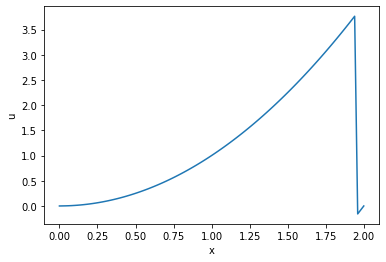

In [64]:
import matplotlib.pyplot as plt

plt.plot(x, u.data[-1])
plt.xlabel('x')
plt.ylabel('u')
plt.show()

# Verification


Before implementing the algorithm, it is convenient to add a source
term to the PDE ([1](#wave:pde1)), since that gives us more freedom in
finding test problems for verification. Physically, a source term acts
as a generator for waves in the interior of the domain.

## A slightly generalized model problem
<div id="wave:pde2:fd"></div>

We now address the following extended initial-boundary value problem
for one-dimensional wave phenomena:

<!-- Equation labels as ordinary links -->
<div id="wave:pde2"></div>

$$
\begin{equation}
u_{tt} = c^2 u_{xx} + f(x,t), \quad x\in (0,L),\ t\in (0,T]
\label{wave:pde2} \tag{17}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="wave:pde2:ic:u"></div>

$$
\begin{equation}  
u(x,0) = I(x), \quad x\in [0,L]
\label{wave:pde2:ic:u} \tag{18}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="wave:pde2:ic:ut"></div>

$$
\begin{equation}  
u_t(x,0) = V(x), \quad x\in [0,L]
\label{wave:pde2:ic:ut} \tag{19}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="wave:pde2:bc:0"></div>

$$
\begin{equation}  
u(0,t)  = 0, \quad  t>0
\label{wave:pde2:bc:0} \tag{20}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="wave:pde2:bc:L"></div>

$$
\begin{equation}  
u(L,t)  = 0, \quad  t>0
\label{wave:pde2:bc:L} \tag{21}
\end{equation}
$$

Sampling the PDE at $(x_i,t_n)$ and using the same finite difference
approximations as above, yields

<!-- Equation labels as ordinary links -->
<div id="wave:pde2:fdop"></div>

$$
\begin{equation}
[D_tD_t u = c^2 D_xD_x u + f]^{n}_i
\label{wave:pde2:fdop} \tag{22}
\end{equation}
$$

Writing this out and solving for the unknown $u^{n+1}_i$ results in

<!-- Equation labels as ordinary links -->
<div id="wave:pde2:step3b"></div>

$$
\begin{equation}
u^{n+1}_i = -u^{n-1}_i + 2u^n_i + C^2
(u^{n}_{i+1}-2u^{n}_{i} + u^{n}_{i-1}) + \Delta t^2 f^n_i
\label{wave:pde2:step3b} \tag{23}
\end{equation}
$$

The equation for the first time step must be rederived. The discretization
of the initial condition $u_t = V(x)$ at $t=0$
becomes

$$
[D_{2t}u = V]^0_i\quad\Rightarrow\quad u^{-1}_i = u^{1}_i - 2\Delta t V_i,
$$

which, when inserted in ([23](#wave:pde2:step3b)) for $n=0$, gives
the special formula

<!-- Equation labels as ordinary links -->
<div id="wave:pde2:step3c"></div>

$$
\begin{equation}
u^{1}_i = u^0_i - \Delta t V_i + {\frac{1}{2}}
C^2
\left(u^{0}_{i+1}-2u^{0}_{i} + u^{0}_{i-1}\right) + \frac{1}{2}\Delta t^2 f^0_i
\label{wave:pde2:step3c} \tag{24}
\end{equation}
$$

## Using an analytical solution of physical significance
<div id="wave:pde2:fd:standing:waves"></div>


Many wave problems feature sinusoidal oscillations in time
and space. For example, the original PDE problem
([1](#wave:pde1))-([5](#wave:pde1:bc:L)) allows an exact solution

<!-- Equation labels as ordinary links -->
<div id="wave:pde2:test:ue"></div>

$$
\begin{equation}
u_e(x,t) = A\sin\left(\frac{\pi}{L}x\right)
\cos\left(\frac{\pi}{L}ct\right)
\label{wave:pde2:test:ue} \tag{25}
\end{equation}
$$

This $u_e$ fulfills the PDE with $f=0$, boundary conditions
$u_e(0,t)=u_e(L,t)=0$, as well as initial
conditions $I(x)=A\sin\left(\frac{\pi}{L}x\right)$ and $V=0$.

**How to use exact solutions for verification.**

mathcal{I}_t is common to use such exact solutions of physical interest
to verify implementations. However, the numerical
solution $u^n_i$ will only be an approximation to $u_e(x_i,t_n)$.
We have no knowledge of the precise size of the error in
this approximation, and therefore we can never know if discrepancies
between $u^n_i$ and $u_e(x_i,t_n)$ are caused
by mathematical approximations or programming errors.
In particular, if plots of the computed solution $u^n_i$ and
the exact one ([25](#wave:pde2:test:ue)) look similar, many
are tempted to claim that the implementation works. However,
even if color plots look nice and the accuracy is "deemed good",
there can still be serious programming errors present!

The only way to use exact physical solutions like
([25](#wave:pde2:test:ue)) for serious and thorough verification is to
run a series of simulations on finer and finer meshes, measure the
integrated error in each mesh, and from this information estimate the
empirical convergence rate of the method.



An introduction to the computing of convergence rates is given in Section 3.1.6
 in [[Langtangen_decay]](#Langtangen_decay).
<!-- % if BOOK == "book": -->
There is also a detailed example on computing convergence rates in
the section [vib:ode1:verify](#vib:ode1:verify).
<!-- % endif -->

In the present problem, one expects the method to have a convergence rate
of 2 (see the section [Analysis of the difference equations](wave_analysis.ipynb)), so if the computed rates
are close to 2 on a sufficiently fine mesh, we have good evidence that
the implementation is free of programming mistakes.

## Manufactured solution and estimation of convergence rates
<div id="wave:pde2:fd:MMS"></div>

### Specifying the solution and computing corresponding data

One problem with the exact solution ([25](#wave:pde2:test:ue)) is
that it requires a simplification (${V}=0, f=0$) of the implemented problem
([17](#wave:pde2))-([21](#wave:pde2:bc:L)). An advantage of using
a *manufactured solution* is that we can test all terms in the
PDE problem. The idea of this approach is to set up some chosen
solution and fit the source term, boundary conditions, and initial
conditions to be compatible with the chosen solution.
Given that our boundary conditions in the implementation are
$u(0,t)=u(L,t)=0$, we must choose a solution that fulfills these
conditions. One example is

$$
u_e(x,t) = x(L-x)\sin t
$$

Inserted in the PDE $u_{tt}=c^2u_{xx}+f$ we get

$$
-x(L-x)\sin t = -c^2 2\sin t + f\quad\Rightarrow f = (2c^2 - x(L-x))\sin t
$$

The initial conditions become

$$
\begin{align*}
u(x,0) =& I(x) = 0,\\ 
u_t(x,0) &= V(x) = x(L-x)
\end{align*}
$$

### Defining a single discretization parameter

To verify the code, we compute the convergence rates in a series of
simulations, letting each simulation use a finer mesh than the
previous one. Such empirical estimation of convergence rates relies on
an assumption that some measure $E$ of the numerical error is related
to the discretization parameters through

$$
E = C_t\Delta t^r + C_x\Delta x^p,
$$

where $C_t$, $C_x$, $r$, and $p$ are constants. The constants $r$ and
$p$ are known as the *convergence rates* in time and space,
respectively.  From the accuracy in the finite difference
approximations, we expect $r=p=2$, since the error terms are of order
$\Delta t^2$ and $\Delta x^2$.  This is confirmed by truncation error
analysis and other types of analysis.

By using an exact solution of the PDE problem, we will next compute
the error measure $E$ on a sequence of refined meshes and see if
the rates $r=p=2$ are obtained. We will not be concerned with estimating
the constants $C_t$ and $C_x$, simply because we are not interested in
their values.

mathcal{I}_t is advantageous to introduce a single discretization parameter
$h=\Delta t=\hat c \Delta x$ for some constant $\hat c$.  Since
$\Delta t$ and $\Delta x$ are related through the Courant number,
$\Delta t = C\Delta x/c$, we set $h=\Delta t$, and then $\Delta x =
hc/C$.  Now the expression for the error measure is greatly
simplified:

$$
E = C_t\Delta t^r + C_x\Delta x^r =
C_t h^r + C_x\left(\frac{c}{C}\right)^r h^r
= Dh^r,\quad D = C_t+C_x\left(\frac{c}{C}\right)^r 
$$

### Computing errors

We choose an initial discretization parameter $h_0$ and run
experiments with decreasing $h$: $h_i=2^{-i}h_0$, $i=1,2,\ldots,m$.
Halving $h$ in each experiment is not necessary, but it is a common
choice.  For each experiment we must record $E$ and $h$.  Standard
choices of error measure are the $\ell^2$ and $\ell^\infty$ norms of the
error mesh function $e^n_i$:

<!-- Equation labels as ordinary links -->
<div id="wave:pde2:fd:MMS:E:l2"></div>

$$
\begin{equation}
E = ||e^n_i||_{\ell^2} = \left( \Delta t\Delta x
\sum_{n=0}^{N_t}\sum_{i=0}^{N_x}
(e^n_i)^2\right)^{\frac{1}{2}},\quad e^n_i = u_e(x_i,t_n)-u^n_i,
\label{wave:pde2:fd:MMS:E:l2} \tag{26}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="wave:pde2:fd:MMS:E:linf"></div>

$$
\begin{equation}  
E = ||e^n_i||_{\ell^\infty} = \max_{i,n} |e^n_i|
\label{wave:pde2:fd:MMS:E:linf} \tag{27}
\end{equation}
$$

In Python, one can compute $\sum_{i}(e^{n}_i)^2$ at each time step
and accumulate the value in some sum variable, say `e2_sum`.  At the
final time step one can do `sqrt(dt*dx*e2_sum)`.  For the
$\ell^\infty$ norm one must compare the maximum error at a time level
(`e.max()`) with the global maximum over the time domain: `e_max = max(e_max, e.max())`.

An alternative error measure is to use a spatial norm at one time step
only, e.g., the end time $T$ ($n=N_t$):

<!-- Equation labels as ordinary links -->
<div id="_auto6"></div>

$$
\begin{equation}
E = ||e^n_i||_{\ell^2} = \left( \Delta x\sum_{i=0}^{N_x}
(e^n_i)^2\right)^{\frac{1}{2}},\quad e^n_i = u_e(x_i,t_n)-u^n_i,
\label{_auto6} \tag{28}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto7"></div>

$$
\begin{equation}  
E = ||e^n_i||_{\ell^\infty} = \max_{0\leq i\leq N_x} |e^{n}_i|
\label{_auto7} \tag{29}
\end{equation}
$$

The important point is that the error measure ($E$) for the simulation is represented by a single number.

### Computing rates

Let $E_i$ be the error measure in experiment (mesh) number $i$ 
(not to be confused with the spatial index $i$) and
let $h_i$ be the corresponding discretization parameter ($h$).
With the error model $E_i = Dh_i^r$, we can
estimate $r$ by comparing two consecutive
experiments:

$$
\begin{align*}
E_{i+1}& =D h_{i+1}^{r},\\ 
E_{i}& =D h_{i}^{r}
\end{align*}
$$

Dividing the two equations eliminates the (uninteresting) constant $D$.
Thereafter, solving for $r$ yields

$$
r = \frac{\ln E_{i+1}/E_{i}}{\ln h_{i+1}/h_{i}}
$$

Since $r$ depends on $i$, i.e., which simulations we compare,
we add an index to $r$: $r_i$, where $i=0,\ldots,m-2$, if we
have $m$ experiments: $(h_0,E_0),\ldots,(h_{m-1}, E_{m-1})$.

In our present discretization of the wave equation we expect $r=2$, and
hence the $r_i$ values should converge to 2 as $i$ increases.

## Constructing an exact solution of the discrete equations
<div id="wave:pde2:fd:verify:quadratic"></div>

With a manufactured or known analytical solution, as outlined above,
we can estimate convergence rates and see if they have the correct
asymptotic behavior. Experience shows that this is a quite good
verification technique in that many common bugs will destroy the
convergence rates. A significantly better test though,
would be to check that the
numerical solution is exactly what it should be. This will in general
require exact knowledge of the numerical error, which we do not normally have
(although we in the section [Analysis of the difference equations](wave_analysis.ipynb) establish such knowledge
in simple cases).
However, it is possible to look for solutions where we can show that
the numerical error vanishes, i.e., the solution of the original continuous
PDE problem is
also a solution of the discrete equations. This property often arises
if the exact solution of the PDE
is a lower-order polynomial. (Truncation error
analysis leads to error measures that involve derivatives of the
exact solution. In the present problem, the truncation error involves
4th-order derivatives of $u$ in space and time. Choosing $u$
as a polynomial of degree three or less
will therefore lead to vanishing error.)

We shall now illustrate the construction of an exact solution to both the
PDE itself and the discrete equations.
Our chosen manufactured solution is quadratic in space
and linear in time. More specifically, we set

<!-- Equation labels as ordinary links -->
<div id="wave:pde2:fd:verify:quadratic:uex"></div>

$$
\begin{equation}
u_e (x,t) = x(L-x)(1+{\frac{1}{2}}t),
\label{wave:pde2:fd:verify:quadratic:uex} \tag{30}
\end{equation}
$$

which by insertion in the PDE leads to $f(x,t)=2(1+t)c^2$. This $u_e$
fulfills the boundary conditions $u=0$ and demands $I(x)=x(L-x)$
and $V(x)={\frac{1}{2}}x(L-x)$.

To realize that the chosen $u_e$ is also an exact
solution of the discrete equations,
we first remind ourselves that $t_n=n\Delta t$ so that

<!-- Equation labels as ordinary links -->
<div id="_auto8"></div>

$$
\begin{equation}
\lbrack D_tD_t t^2\rbrack^n = \frac{t_{n+1}^2 - 2t_n^2 + t_{n-1}^2}{\Delta t^2}
= (n+1)^2 -2n^2 + (n-1)^2 = 2,
\label{_auto8} \tag{31}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto9"></div>

$$
\begin{equation}  
\lbrack D_tD_t t\rbrack^n = \frac{t_{n+1} - 2t_n + t_{n-1}}{\Delta t^2}
= \frac{((n+1) -2n + (n-1))\Delta t}{\Delta t^2} = 0
\label{_auto9} \tag{32}
\end{equation}
$$

Hence,

$$
[D_tD_t u_e]^n_i = x_i(L-x_i)[D_tD_t (1+{\frac{1}{2}}t)]^n =
x_i(L-x_i){\frac{1}{2}}[D_tD_t t]^n = 0
$$

Similarly, we get that

$$
\begin{align*}
\lbrack D_xD_x u_e\rbrack^n_i &=
(1+{\frac{1}{2}}t_n)\lbrack D_xD_x (xL-x^2)\rbrack_i\\ 
& =
(1+{\frac{1}{2}}t_n)\lbrack LD_xD_x x - D_xD_x x^2\rbrack_i \\ 
&= -2(1+{\frac{1}{2}}t_n)
\end{align*}
$$

Now, $f^n_i = 2(1+{\frac{1}{2}}t_n)c^2$, which results in

$$
[D_tD_t u_e - c^2D_xD_xu_e - f]^n_i = 0 +
c^2 2(1 + {\frac{1}{2}}t_{n}) +
2(1+{\frac{1}{2}}t_n)c^2 = 0
$$

Moreover, $u_e(x_i,0)=I(x_i)$,
$\partial u_e/\partial t = V(x_i)$ at $t=0$, and
$u_e(x_0,t)=u_e(x_{N_x},0)=0$. Also the modified scheme for the
first time step is fulfilled by $u_e(x_i,t_n)$.

Therefore, the exact solution $u_e(x,t)=x(L-x)(1+t/2)$ of the PDE
problem is also an exact solution of the discrete problem.  This means
that we know beforehand what numbers the numerical algorithm should
produce.  We can use this fact to check that the computed $u^n_i$
values from an implementation equals $u_e(x_i,t_n)$, within machine
precision.  This result is valid *regardless of the mesh spacings*
$\Delta x$ and $\Delta t$!  Nevertheless, there might be stability
restrictions on $\Delta x$ and $\Delta t$, so the test can only be run
for a mesh that is compatible with the stability criterion (which in
the present case is $C\leq 1$, to be derived later).

**Notice.**

A product of quadratic or linear expressions in the various
independent variables, as shown above, will often fulfill both the
PDE problem and the discrete equations, and can therefore be very useful
solutions for verifying implementations.

However, for 1D wave
equations of the type $u_{tt}=c^2u_{xx}$ we shall see that there is always
another much more powerful way of generating exact
solutions (which consists in just setting $C=1$ (!), as shown in
the section [Analysis of the difference equations](wave_analysis.ipynb)).